# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading files

In [2]:
inp0=pd.read_csv(r"C:\Users\HP\Downloads\previous_application.csv",header=0)
inp1=pd.read_csv(r"C:\Users\HP\Downloads\application_data.csv",header=0)

# Removing warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Reading data

In [4]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Analyzing inp1 data

# Removing unwanted data

In [6]:
#Finding shape of inp1
inp1.shape

(307511, 122)

In [7]:
#Dropping of the unwanted columns
NotRequired=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','EXT_SOURCE_2','EXT_SOURCE_3']
inp1.drop(labels=NotRequired,axis=1,inplace=True)

In [8]:
#Finding shape after dropping 38 columns
inp1.shape

(307511, 84)

# Analyzing application data

In [9]:
#Finding the columns of dataype object in inp1
inp1.select_dtypes(include=["object"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick"
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick"
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick"


In [10]:
#storing all the object type columns in differnet data frame so that we can filter out the missing data easily
inp2_object=inp1.select_dtypes(include=["object"])

In [11]:
#To find shape of new data frame 
inp2_object.shape

(307511, 15)

In [12]:
#To find NAN values in inp2_object
inp2_object.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
dtype: int64

In [13]:
#To find elements present in FONDKAPREMONT_MODE
inp2_object["FONDKAPREMONT_MODE"].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [14]:
#To find elements present in HOUSETYPE_MODE
inp2_object["HOUSETYPE_MODE"].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [15]:
#To find elements present in WALLSMATERIAL_MODE
inp2_object["WALLSMATERIAL_MODE"].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [16]:
#To find elements in OCCUPATION_TYPE
inp2_object["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
#To find elements in NAME_TYPE_SUITE
inp2_object["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [18]:
#Storing all the columns having int data type in different dataframe so that we can easily find Nan values
inp2_int=inp1.select_dtypes(include=["int64"])

In [19]:
inp2_int.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,-9461,-637,-2120,10,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,11,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,9,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,17,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,11,0,0,0,0,1,1


In [20]:
#To find NaN values in inp2_int
inp2_int.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

In [21]:
#Observation: From above it is observed that there are no columns of integer type that have Null values

In [22]:
#Storing the columns of float data type in different dataframe 
inp2_float=inp1.select_dtypes(include=["float"])

In [23]:
inp2_float.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pd.set_option('display.max_rows',None)# using this to print entire information
inp2_float.isnull().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
REGION_POPULATION_RELATIVE         0
DAYS_REGISTRATION                  0
OWN_CAR_AGE                   202929
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  173378
APARTMENTS_AVG                156061
BASEMENTAREA_AVG              179943
YEARS_BUILD_AVG               204488
COMMONAREA_AVG                214865
ELEVATORS_AVG                 163891
ENTRANCES_AVG                 154828
FLOORSMIN_AVG                 208642
LANDAREA_AVG                  182590
LIVINGAPARTMENTS_AVG          210199
LIVINGAREA_AVG                154350
NONLIVINGAPARTMENTS_AVG       213514
NONLIVINGAREA_AVG             169682
APARTMENTS_MODE               156061
BASEMENTAREA_MODE             179943
YEARS_BUILD_MODE              204488
COMMONAREA_MODE               214865
ELEVATORS_MODE                163891
ENTRANCES_MODE                154828
F

In [25]:
#Finding shape of inp1
inp1.shape

(307511, 84)

In [26]:
#Finding rows in AMT_ANNUITY which contains Nan values
inp2_float[inp2_float["AMT_ANNUITY"].isnull()]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,180000.0,450000.0,NaN,450000.0,0.026392,-4946.0,NaN,1.0,NaN,0.0124,...,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0
50035,94500.0,450000.0,NaN,450000.0,0.035792,-3640.0,NaN,2.0,NaN,NaN,...,0.0,0.0,0.0,-706.0,0.0,0.0,0.0,1.0,0.0,1.0
51594,202500.0,539100.0,NaN,450000.0,0.046220,-11524.0,NaN,2.0,0.885980,NaN,...,0.0,1.0,0.0,-199.0,0.0,0.0,0.0,1.0,0.0,1.0
55025,162000.0,296280.0,NaN,225000.0,0.035792,-3195.0,NaN,2.0,0.336803,NaN,...,0.0,0.0,0.0,-2841.0,0.0,0.0,0.0,1.0,0.0,4.0
59934,202500.0,360000.0,NaN,360000.0,0.046220,-11285.0,4.0,1.0,0.647350,0.0856,...,0.0,0.0,0.0,-743.0,0.0,0.0,1.0,0.0,0.0,6.0
75873,144000.0,219249.0,NaN,166500.0,0.022800,-771.0,8.0,1.0,0.339389,0.0928,...,0.0,0.0,0.0,-1986.0,0.0,0.0,0.0,0.0,0.0,11.0
89343,90000.0,157500.0,NaN,157500.0,0.015221,-858.0,2.0,2.0,0.682126,0.1227,...,0.0,0.0,0.0,-348.0,0.0,0.0,0.0,2.0,0.0,0.0
123872,202500.0,929088.0,NaN,720000.0,0.019689,-168.0,NaN,2.0,0.400723,NaN,...,0.0,0.0,0.0,-1331.0,0.0,0.0,0.0,0.0,1.0,5.0
207186,171000.0,486000.0,NaN,486000.0,0.018634,-10127.0,NaN,2.0,NaN,NaN,...,0.0,0.0,0.0,-295.0,0.0,0.0,1.0,1.0,0.0,2.0
227939,315000.0,628069.5,NaN,499500.0,0.046220,-482.0,NaN,2.0,NaN,0.1918,...,0.0,1.0,0.0,-1255.0,0.0,0.0,1.0,0.0,0.0,2.0


In [27]:
#We can drop NAN values in AMT_ANNUITY because there is no contract between the person and insurance company so the loan is also not valid
inp1=inp1[~inp1["AMT_ANNUITY"].isnull()]

In [28]:
#Checking the shape of inp2_float after dropping the values
inp1.shape

(307499, 84)

In [29]:
#Grouping the occupation on basis of amount goods price
inp1.groupby("OCCUPATION_TYPE")["AMT_GOODS_PRICE"].count()

OCCUPATION_TYPE
Accountants               9801
Cleaning staff            4648
Cooking staff             5939
Core staff               27530
Drivers                  18589
HR staff                   563
High skill tech staff    11370
IT staff                   525
Laborers                 55132
Low-skill Laborers        2092
Managers                 21347
Medicine staff            8527
Private service staff     2648
Realty agents              751
Sales staff              32063
Secretaries               1304
Security staff            6712
Waiters/barmen staff      1346
Name: AMT_GOODS_PRICE, dtype: int64

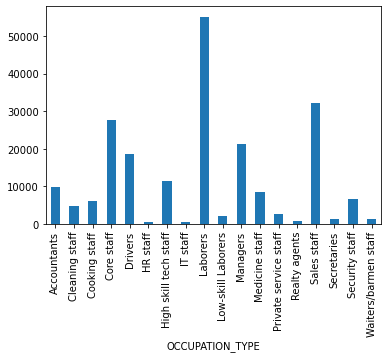

In [30]:
#Plotting bar plot to analyse the data more clearly graphically
inp1.groupby("OCCUPATION_TYPE")["AMT_GOODS_PRICE"].count().plot.bar()
plt.show()

In [31]:
#Observation: From the above graph it is clear that Laborers have more amount good price value

In [32]:
#to find null percentage because interpretation based on percentage give clear information
#Creating a function to calculate the percentage so that this fumcion can be called to find the percentage every time
def nan_percent(inp1):
    output = round(inp1.isnull().sum()/len(inp1.index)*100,2)
    return output

In [33]:
#Finding nan percentage by calling function nan_percent
nan_value=nan_percent(inp1)
nan_value

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
R

In [34]:
#To find columns whose nan percentage is greater than 0%
nan_value=nan_value[nan_value>0]
nan_value

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OWN_CAR_AGE                   65.99
OCCUPATION_TYPE               31.35
EXT_SOURCE_1                  56.38
APARTMENTS_AVG                50.75
BASEMENTAREA_AVG              58.52
YEARS_BUILD_AVG               66.50
COMMONAREA_AVG                69.87
ELEVATORS_AVG                 53.30
ENTRANCES_AVG                 50.35
FLOORSMIN_AVG                 67.85
LANDAREA_AVG                  59.38
LIVINGAPARTMENTS_AVG          68.35
LIVINGAREA_AVG                50.19
NONLIVINGAPARTMENTS_AVG       69.43
NONLIVINGAREA_AVG             55.18
APARTMENTS_MODE               50.75
BASEMENTAREA_MODE             58.52
YEARS_BUILD_MODE              66.50
COMMONAREA_MODE               69.87
ELEVATORS_MODE                53.30
ENTRANCES_MODE                50.35
FLOORSMIN_MODE                67.85
LANDAREA_MODE                 59.38
LIVINGAPARTMENTS_MODE         68.35
LIVINGAREA_MODE               50.19
NONLIVINGAPARTMENTS_MODE    

In [35]:
#identifying columns having null percentage greater than 50%
nan_value_50=nan_value[nan_value>50]
nan_value_50

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [36]:
#Calculating the total number of columns whose percentage is greater than 50%
nan_value_50.count()

41

In [37]:
#Storing the column name in a variable so that it can be directly used when required 
a=nan_value_50.index
a

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [38]:
#Dropping the rows who have percentage greater than nan value 50% 
inp2_reduce=inp1.drop(a,axis=1)

In [39]:
#After dropping 41 columns finding the shape 
inp2_reduce.shape

(307499, 43)

In [40]:
#identifying columns having null percentage less than 30
nan_value_30=nan_value[nan_value<30]
nan_value_30

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [41]:
#analyzing each data which has nan value less than 30%
inp2_reduce['AMT_GOODS_PRICE'].dtype

dtype('float64')

In [42]:
#['AMT_GOODS_PRICE'] is a continuous variable hence we will find mean and median
inp2_reduce['AMT_GOODS_PRICE'].describe()

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

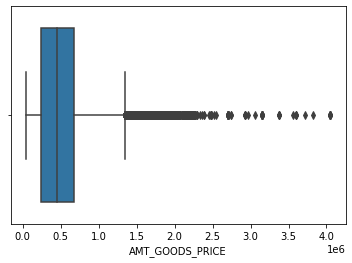

In [43]:
#Check box plot of ['AMT_GOODS_PRICE']
sns.boxplot(inp2_reduce['AMT_GOODS_PRICE'])
plt.show()

In [44]:
# In ['AMT_GOODS_PRICE'] there are too many NaN hence we will fill tha Nan value with median
m=inp2_reduce['AMT_GOODS_PRICE'].median()
m

450000.0

In [45]:
# Filling m in AMT_GOODS_PRICE at place of NaN
inp2_reduce["AMT_GOODS_PRICE"]=inp2_reduce["AMT_GOODS_PRICE"].fillna('m')

In [46]:
#Checking the Null values after replacing it
inp2_reduce["AMT_GOODS_PRICE"].isnull().sum()

0

In [47]:
#In OBS_30_CNT_SOCIAL_CIRCLE check the data type
inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"].dtype

dtype('float64')

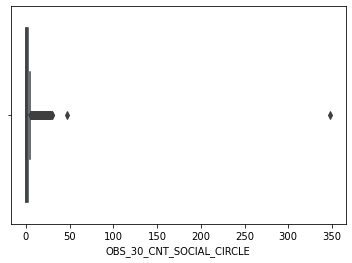

In [48]:
#Plotting box plot for OBS_30_CNT_SOCIAL_CIRCLE
sns.boxplot(inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.show()

In [49]:
#There are NaN in OBS_30_CNT_SOCIAL_CIRCLE thus we will replace by median
inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"]=inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"].median())

In [50]:
#Checking Nan count if they are removed or not
inp2_reduce["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

In [51]:
# Checking DEF_30_CNT_SOCIAL_CIRCLE
inp2_reduce["DEF_30_CNT_SOCIAL_CIRCLE"].dtype

dtype('float64')

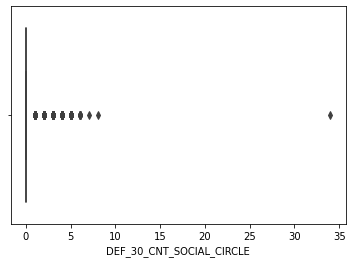

In [52]:
#Finding outlier in DEF_30_CNT_SOCIAL_CIRCLE by plotting box plot
sns.boxplot(inp2_reduce['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [53]:
inp2_reduce["OBS_60_CNT_SOCIAL_CIRCLE"].dtype

dtype('float64')

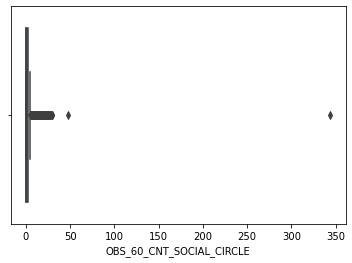

In [54]:
#Finding outlier in OBS_60_CNT_SOCIAL_CIRCLE by plotting box plot
sns.boxplot(inp2_reduce['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [55]:
inp2_reduce["DEF_60_CNT_SOCIAL_CIRCLE"].dtype

dtype('float64')

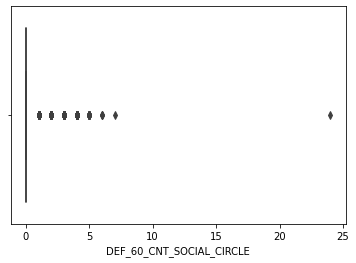

In [56]:
#Finding outlier in DEF_60_CNT_SOCIAL_CIRCLE by plotting box plot
sns.boxplot(inp2_reduce['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [57]:
#For all the above 3 filling nan value with median 
inp2_reduce["DEF_30_CNT_SOCIAL_CIRCLE"]=inp2_reduce["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(inp2_reduce["DEF_30_CNT_SOCIAL_CIRCLE"].median())
inp2_reduce["OBS_60_CNT_SOCIAL_CIRCLE"]=inp2_reduce["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(inp2_reduce["OBS_60_CNT_SOCIAL_CIRCLE"].median())
inp2_reduce["DEF_60_CNT_SOCIAL_CIRCLE"]=inp2_reduce["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(inp2_reduce["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [58]:
# In NAME_TYPE_SUITE check the data type
inp2_reduce["NAME_TYPE_SUITE"].dtype

dtype('O')

In [59]:
# NAME_TYPE_SUITE it is a categorical type thus we will replace nan value with mode
mode1=inp2_reduce["NAME_TYPE_SUITE"].mode()[0]
mode1

'Unaccompanied'

In [60]:
#Filling the NAME_TYPE_SUITE with mode value
inp2_reduce["NAME_TYPE_SUITE"]=inp2_reduce["NAME_TYPE_SUITE"].fillna('mode1')

In [61]:
#Checking the count of NaN value after filling it with mode value
inp2_reduce["NAME_TYPE_SUITE"].isnull().sum()

0

In [62]:
#Checking for AMT_REQ_CREDIT_BUREAU_HOUR    
inp2_reduce["AMT_REQ_CREDIT_BUREAU_HOUR"].dtype

dtype('float64')

In [63]:
inp2_reduce["AMT_REQ_CREDIT_BUREAU_DAY"].dtype

dtype('float64')

In [64]:
inp2_reduce["AMT_REQ_CREDIT_BUREAU_WEEK"].dtype

dtype('float64')

In [65]:
inp2_reduce["AMT_REQ_CREDIT_BUREAU_MON"].dtype

dtype('float64')

In [66]:
inp2_reduce["AMT_REQ_CREDIT_BUREAU_QRT"].dtype

dtype('float64')

In [67]:
inp2_reduce["AMT_REQ_CREDIT_BUREAU_YEAR"].dtype

dtype('float64')

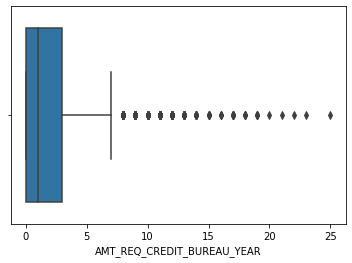

In [68]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_YEAR to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

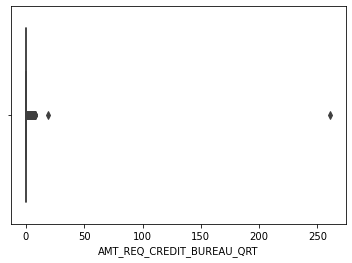

In [69]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_QRT to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_QRT"])
plt.show()

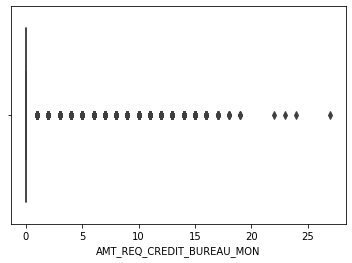

In [70]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_MON to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_MON"])
plt.show()

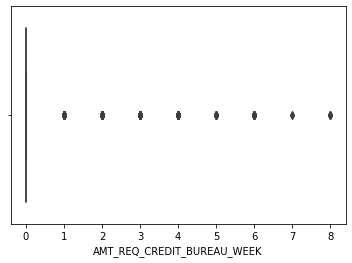

In [71]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_WEEK to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_WEEK"])
plt.show()

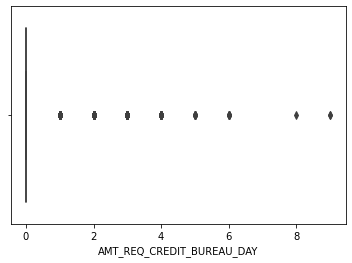

In [72]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_DAY to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.show()

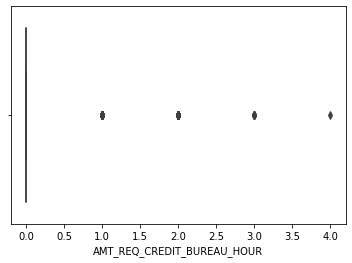

In [73]:
#Plotting box plot for AMT_REQ_CREDIT_BUREAU_HOUR to check outliers
sns.boxplot(inp2_reduce["AMT_REQ_CREDIT_BUREAU_HOUR"])
plt.show()

In [74]:
#Similarly replacing the other Nan value with their respective median 
inp2_reduce["AMT_REQ_CREDIT_BUREAU_HOUR"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_HOUR"].median())
inp2_reduce["AMT_REQ_CREDIT_BUREAU_DAY"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_DAY"].median())
inp2_reduce["AMT_REQ_CREDIT_BUREAU_WEEK"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_WEEK"].median())
inp2_reduce["AMT_REQ_CREDIT_BUREAU_MON"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_MON"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_MON"].median())
inp2_reduce["AMT_REQ_CREDIT_BUREAU_QRT"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_QRT"].median())
inp2_reduce["AMT_REQ_CREDIT_BUREAU_YEAR"]=inp2_reduce["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(inp2_reduce["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [75]:
#to find null percentage
def nan_percent(inp2_reduce):
    output = round(inp2_reduce.isnull().sum()/len(inp2_reduce.index)*100,2)
    return output

In [76]:
#identifying columns having null percentage less than 30
nan_value_again=nan_percent(inp2_reduce)
nan_value_again

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
L

In [77]:
#Observation: From this we can see that Occupation type have percentage 31.35 .But it is important column then we will not drop this column

In [78]:
inp2_reduce.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
inp2_reduce.shape

(307499, 43)

In [80]:
inp2_reduce.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                 object
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGIO

In [81]:
inp2_reduce.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#Removing negative values in DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH 
inp2_reduce['DAYS_LAST_PHONE_CHANGE']=inp2_reduce['DAYS_LAST_PHONE_CHANGE'].abs()
inp2_reduce['DAYS_BIRTH'] = inp2_reduce['DAYS_BIRTH'].abs()
inp2_reduce['DAYS_EMPLOYED'] = inp2_reduce['DAYS_EMPLOYED'].abs()
inp2_reduce['DAYS_ID_PUBLISH'] = inp2_reduce['DAYS_ID_PUBLISH'].abs()

In [83]:
inp2_reduce.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#Storing the object type data type variable in different data frame so that further analysis can be done
inp2_object=inp2_reduce.select_dtypes(include=["object"])

In [85]:
inp2_object.dtypes

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
AMT_GOODS_PRICE               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
dtype: object

In [86]:
#Checking the object type columns to see if it contains unwanted enteries 
inp2_reduce['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10553
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [87]:
#Observation: # It contains XNA which also mean not available.Finding its percentage to decide whether it should be dropped or replaced 

In [88]:
#counting percentage of xna in ORGANIZATION_TYPE
xna_1=inp2_reduce[inp2_reduce["ORGANIZATION_TYPE"]=="XNA"].shape[0]
xna_1
xna_p=(xna_1/len(inp2_reduce.index)*100)
xna_p

18.00786344020631

In [89]:
#removing the rows containing as percentage of data is less i.e 18%
inp2_reduce=inp2_reduce.drop(inp2_reduce.loc[inp2_reduce["ORGANIZATION_TYPE"]=="XNA"].index)
inp2_reduce[inp2_reduce["ORGANIZATION_TYPE"]=="XNA"].shape[0]


0

In [90]:
#Checking the object type columns to see if it contains unwanted enteries 
inp2_reduce['CODE_GENDER'].value_counts()# it contains XNA which also mean not available thus replacing those with  

F      157169
M       94952
XNA         4
Name: CODE_GENDER, dtype: int64

In [91]:
#Observation: # It contains XNA which also mean not available.Finding its percentage to decide whether it should be dropped or replaced 

In [92]:
#counting percentage of xna in CODE_GENDER
xna_2=inp2_reduce[inp2_reduce["CODE_GENDER"]=="XNA"].shape[0]
xna_2
xna_p1=(xna_2/len(inp2_reduce.index)*100)
xna_p1

0.0015865146256817057

In [93]:
#removing the rows containing as percentage of data is less i.e 0.0015
inp2_reduce=inp2_reduce.drop(inp2_reduce.loc[inp2_reduce["CODE_GENDER"]=="XNA"].index)
inp2_reduce[inp2_reduce["CODE_GENDER"]=="XNA"].shape[0]


0

In [94]:
# Main factor for deciding loan can be based on person Total income and credit amount i.e AMT_INCOME_TOTAL and AMT_CREDIT  
#These two column have continuous numerical values hence can be divided into bins
inp2_reduce['AMT_INCOME_TOTAL'].describe()

count    2.521210e+05
mean     1.759134e+05
std      2.588593e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
inp2_reduce['AMT_CREDIT'].describe()

count    2.521210e+05
mean     6.114040e+05
std      4.065318e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.294400e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [96]:
#Depending on max and min values we can divide data into bins for easy interpretation
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
inp2_reduce['AMT_INCOME_R']=pd.cut(inp2_reduce['AMT_INCOME_TOTAL'],bins,labels=slot)
inp2_reduce['AMT_INCOME_R'].value_counts()

100000-200000       129851
200000-300000        57706
<100000              43669
300000-400000        13436
400000-500000         4916
500000 and above      2543
Name: AMT_INCOME_R, dtype: int64

In [97]:
#Depending on max and min values we can divide data into bins for easy interpretation
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']
inp2_reduce['AMT_CREDIT_R']=pd.cut(inp2_reduce['AMT_CREDIT'],bins,labels=slot)
inp2_reduce['AMT_CREDIT_R'].value_counts()

900000 and above    50715
200000-300000       42460
500000-600000       27921
400000-500000       27104
100000-200000       24100
300000-400000       21884
600000-700000       19712
850000-900000       18539
700000-800000       15418
<100000              4268
Name: AMT_CREDIT_R, dtype: int64

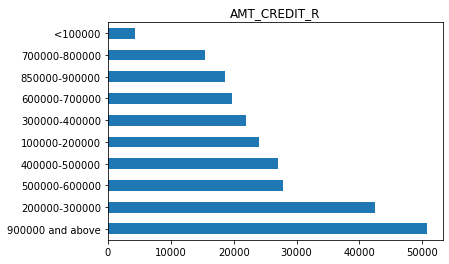

In [98]:
#Plotting graohs of AMT_CREDIT_R
#plt.figure(figsize = (10,10))
inp2_reduce['AMT_CREDIT_R'].value_counts().plot.barh()
plt.title('AMT_CREDIT_R')
plt.show()


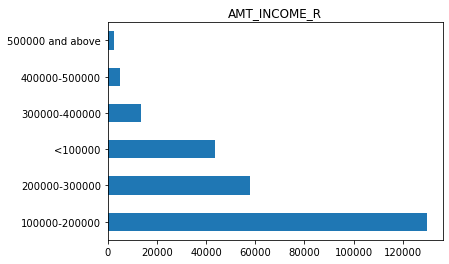

In [99]:
#Plotting graohs of AMT_INCOME_R
#plt.figure(figsize = (10,10))
inp2_reduce['AMT_INCOME_R'].value_counts().plot.barh()
plt.title('AMT_INCOME_R')
plt.show()


# Univariate analysis

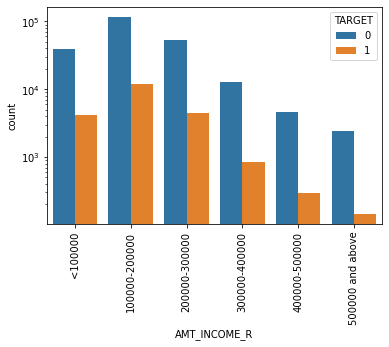

In [100]:
#Plotting graph for AMT_INCOME_R based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'AMT_INCOME_R', hue = 'TARGET', data = inp2_reduce)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()


In [101]:
#Observation: from graph it is clear that the person whose total income is more than 600000 and above do not have any payment difficulties
#Observation: the people who have income between 100000-200000 have both defaulters and not defaulters person count high

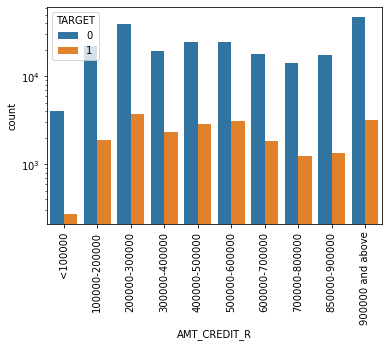

In [102]:
#Plotting graph for AMT_CREDIT_R based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'AMT_CREDIT_R', hue = 'TARGET', data = inp2_reduce)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()


In [103]:
#Observation:  from graph it is clear that the person whose credit amount is 900000 and above have no payment difficulties
#Observation: the people having credit <100000 in them very lesspeople are having payment difficulties

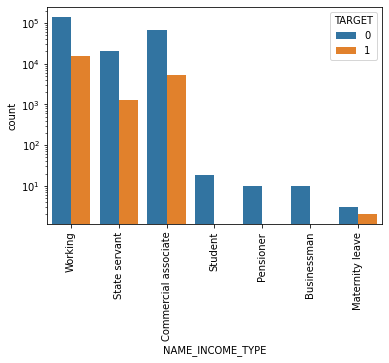

In [104]:
#Plotting graph for NAME_INCOME_TYPE based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = inp2_reduce)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [105]:
#Observation: In this we see that if occupation type is Student,Pensioner,Businessman then they do not have any problem in loan payment beacause we can see that there is no data for target 1
#Observation: Working and commercial state have compartively higher people who have problem in loan payment and also maximum people who pay loan on time

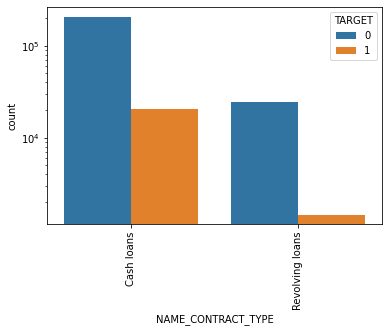

In [106]:
#Plotting graph for NAME_CONTRACT_TYPE based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = inp2_reduce)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [107]:
#Observation: The people who are having problem in loan payment their contract type is cash loans
#Observation: Revolving loans is the best method to adopt because in this case there are very less people who are having problem in loan payment

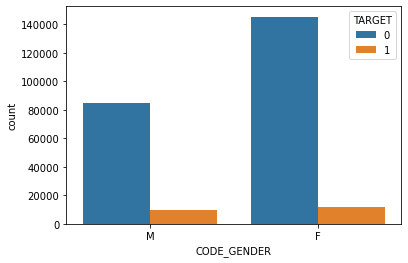

In [108]:
#Plotting graph for CODE_GENDER based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = inp2_reduce)
plt.show()

In [109]:
#Observation: Female are more in number who paytheir loan at time compared with male

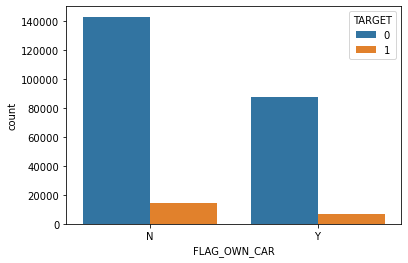

In [110]:
#Plotting graph for FLAG_OWN_CAR based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'TARGET', data = inp2_reduce)
plt.show()

In [111]:
#Observation: Person who do not have car pay their loan at time 

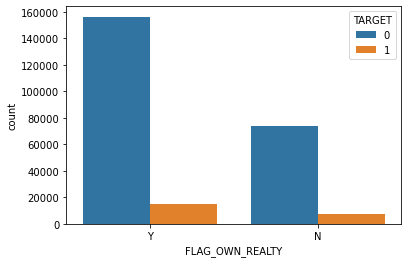

In [112]:
#Plotting graph for FLAG_OWN_REALTY based on target value 0 and 1 so that we can analyse that how the income of people is related to defaulter and non defaulter people
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'TARGET', data = inp2_reduce)
plt.show()

In [113]:
#Observation: person who have their own flat or house they are more financial stable hence able to pay loan on time

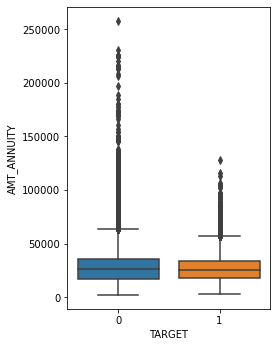

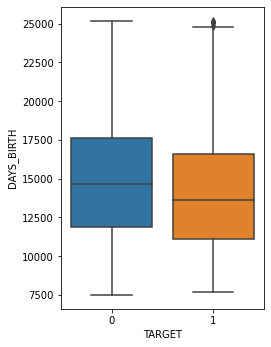

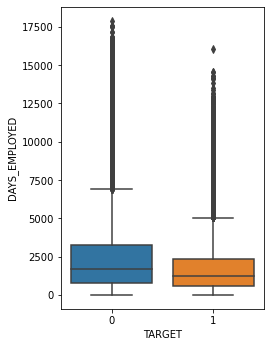

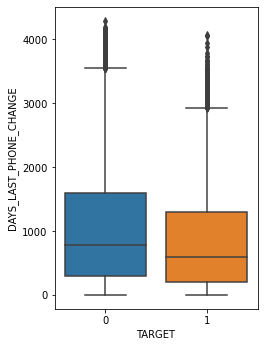

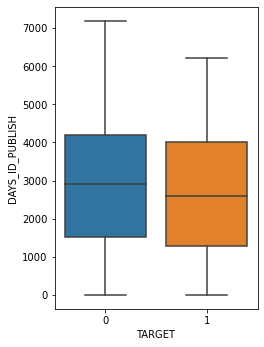

In [114]:
#Plotting box plot for the columns which are related to person history like their employment days,days for phone change,their birth and like this
column_name = ['AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
for i in enumerate(column_name):
    plt.figure(figsize = (8, 20))
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.3)
    sns.boxplot(x='TARGET',y=i[1],data=inp2_reduce)
    plt.show()

In [115]:
#From the graphs we can see that in AMT_ANNUITY there are lot of outliers both in target-0 and 1.Also the value of interquartile range is very less
#In DAYS_BIRTH,DAYS_ID_PUBLISH there are no or very less outliers
#In DAYS_EMPLOYED there is one value for target=1 at very extreme

# Dividing the content based on target value 0 and 1

In [116]:
target0=inp2_reduce.loc[inp2_reduce["TARGET"]==0]
target1=inp2_reduce.loc[inp2_reduce["TARGET"]==1]

In [117]:
#Finding size of target0 dataframe
len(target0)

230286

In [118]:
#Finding size of target1 dataframe
len(target1)

21835

# Bivariate Analysis

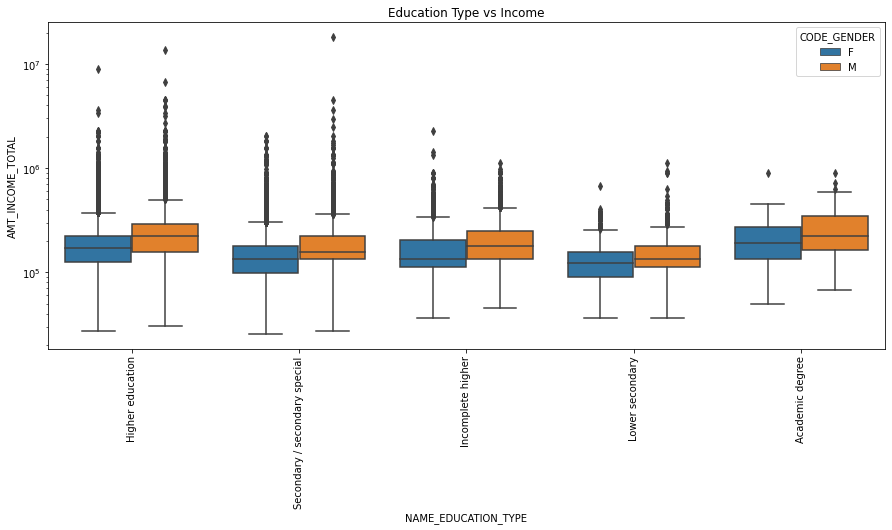

In [119]:
# Analysis between AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE based on CODE_GENDER for target 0
plt.figure(figsize=[15,6])
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='CODE_GENDER',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Income')
plt.show()

In [120]:
#Observation: From this graph it is clear that the male and female having education as academic degree and earned more than 250000 are able to pay the loan at time

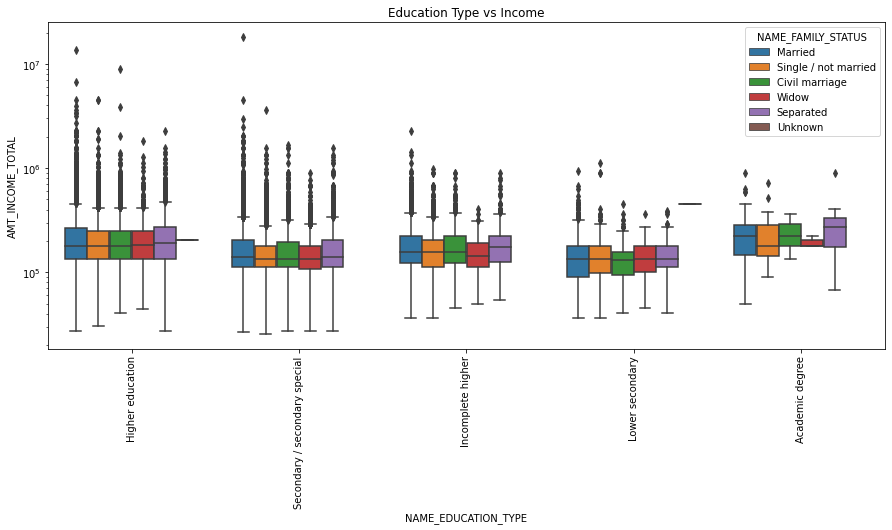

In [121]:
# Analysis between AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE based on NAME_FAMILY_STATUS for target 0
plt.figure(figsize=[15,6])
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Income')
plt.show()

In [122]:
#Observation: From this graph it is clear that the lower secondary have less income than others also the person whose family status is unknown has higher income
#Observation: From the higher education and secondary special all the family status people have almost same income

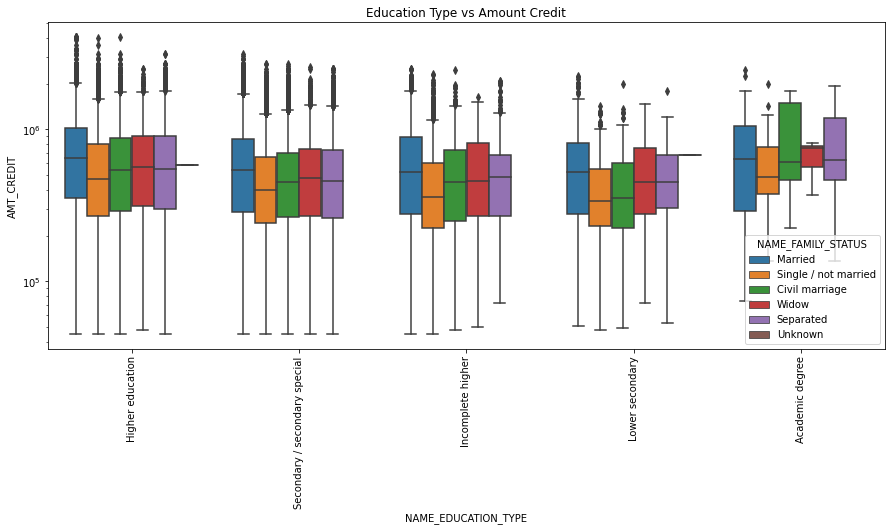

In [123]:
# Analysis between AMT_CREDIT and NAME_EDUCATION_TYPE based on NAME_FAMILY_STATUS for target 0
plt.figure(figsize=[15,6])
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [124]:
#Observation: From this graph it is clear that the academic degree person of civil marriage family status have high credit amount and also more outlier


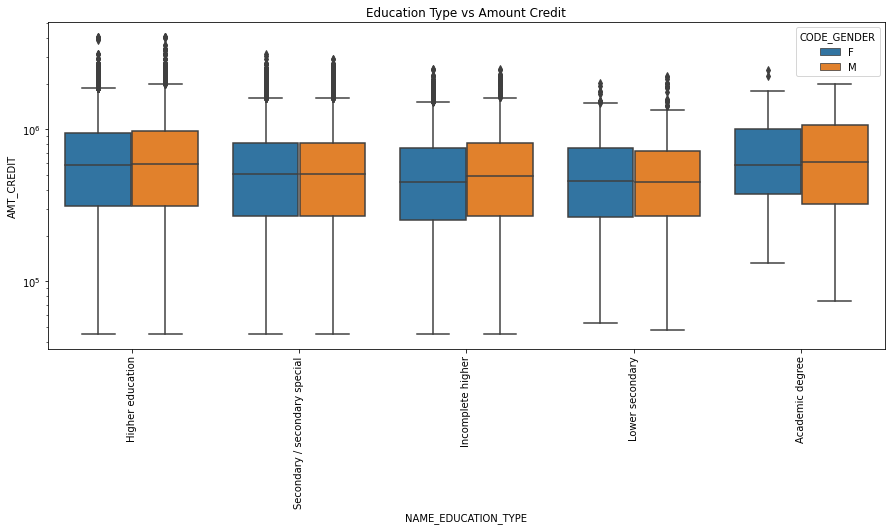

In [125]:
# Analysis between AMT_CREDIT and NAME_EDUCATION_TYPE based on CODE_GENDER for target 0
plt.figure(figsize=[15,6])
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='CODE_GENDER',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [126]:
#Observation: From this graph it is clear that the male and female having education as academic degree and have credit more than 600000 are able to pay the loan at time

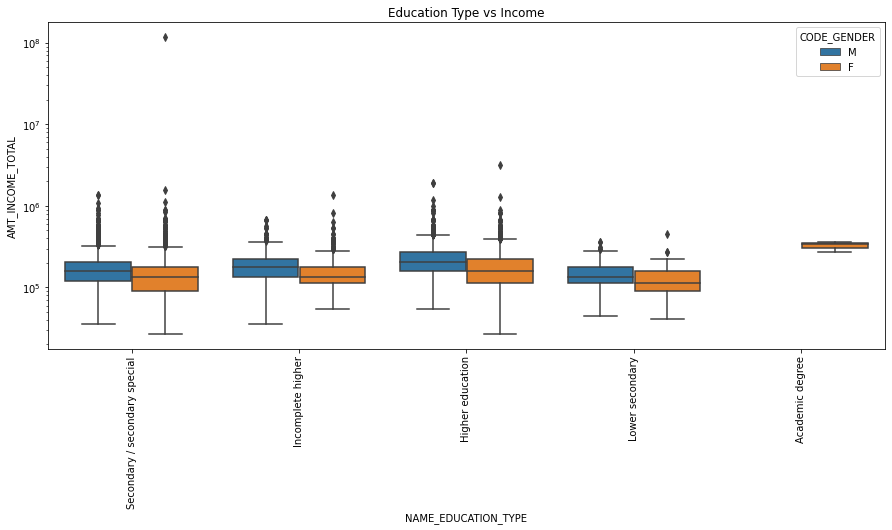

In [127]:
# Analysis between AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE based on CODE_GENDER for target 1
plt.figure(figsize=[15,6])
sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='CODE_GENDER',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Income')
plt.show()

In [128]:
#Observation: From this graph it is clear that no male having education as academic degree and earned more than 300000 are not defaulter

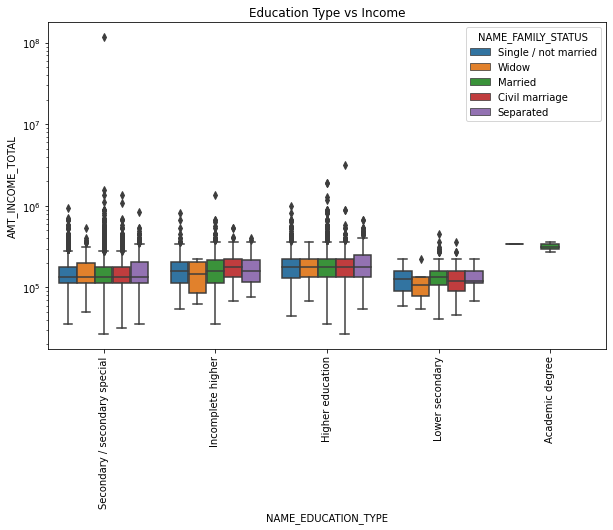

In [129]:
# Analysis between AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE based on NAME_FAMILY_STATUS for target 1
plt.figure(figsize=[10,6])
sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Income')
plt.show()

In [130]:
#Observation: From this we can say that the person who are married/single people whose income lie above 300000 have problem in loan payment

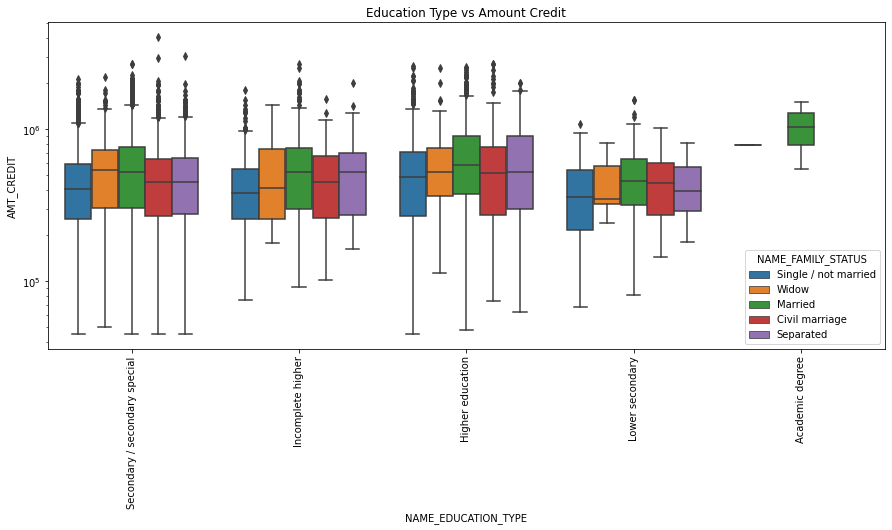

In [131]:
# Analysis between AMT_CREDIT and NAME_EDUCATION_TYPE based on NAME_FAMILY_STATUS for target 1
plt.figure(figsize=[15,6])
sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [132]:
#Observation: From this graph it is clear that the academic degree person of married family status have high credit amount 

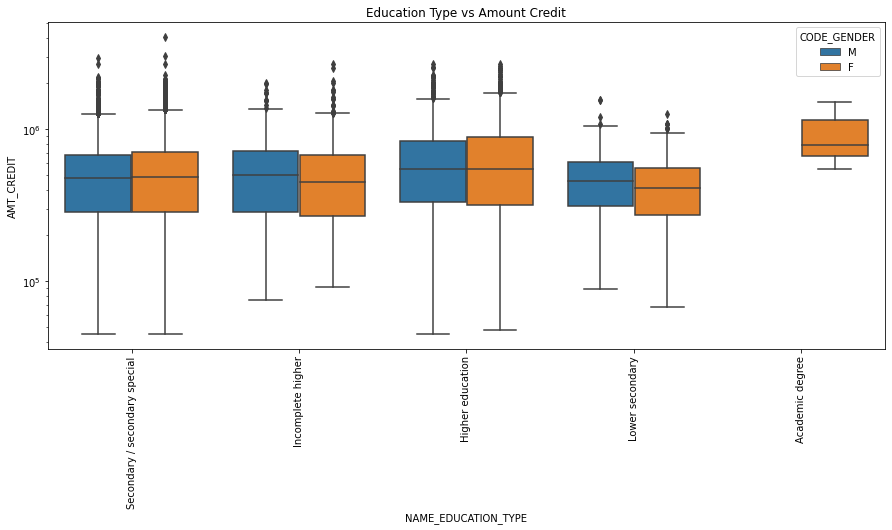

In [133]:
# Analysis between AMT_CREDIT and NAME_EDUCATION_TYPE based on CODE_GENDER for target 1
plt.figure(figsize=[15,6])
sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='CODE_GENDER',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [134]:
#Observation: From this graph it is clear that the no male having education as academic degree have problem in paying loans

# Correlation

In [135]:
#Finding top 10 correlation for target value 0
x=target0.corr()
a=x.unstack().sort_values(ascending=False)
b=a[a<1]
b.head(10)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998492
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998492
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893277
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893277
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861439
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861439
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860381
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860381
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.820814
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820814
dtype: float64

In [136]:
#Observation: Correlation nearest to 1 is between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_SOCIAL_CIRCLE

In [137]:
#Finding top 10 correlation for target value 1
x=target1.corr()
a=x.unstack().sort_values(ascending=False)
b=a[a<1]
b.head(10)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998289
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998289
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867983
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867983
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.768247
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.768247
dtype: float64

In [138]:
#Observation: Correlation nearest to 1 is between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_SOCIAL_CIRCLE

# Analyzing inp0 data

In [139]:
#Finding shape of inp0
inp0.shape

(1670214, 37)

In [140]:
#Finding data types of inp0
inp0.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [141]:
#Finding percent of null values
inp0_nan=inp0.isnull().sum()*100/len(inp0)
inp0_nan

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [142]:
#columns having null percentage greter than 50%
inp0_nan_50=inp0_nan[inp0_nan>50]
inp0_nan_50

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [143]:
#dropping the 4 columns whose null percentage is greater than 50
inp0=inp0.drop(inp0_nan_50.index,axis=1)

In [144]:
#Finding shape of inp0 after removing the columns
inp0.shape

(1670214, 33)

In [145]:
#dropping unwanted columns
x=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY']

inp0.drop(labels=x,axis=1,inplace=True)


In [146]:
#Finding shape of inp0 after removing the unwanted columns
inp0.shape

(1670214, 30)

In [147]:
#Finding shape of inp2_reduce after removing the unwanted columns
inp2_reduce.shape

(252121, 45)

# Combining the two dataset for further analysis

In [148]:
inp_merge=pd.merge(left=inp2_reduce,right=inp0,how='inner',on='SK_ID_CURR')

In [149]:
inp_merge.shape

(1139970, 74)

In [150]:
inp_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [151]:
inp_merge.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x                object
NAME_TYPE_SUITE_x                object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


# Univariate Analysis

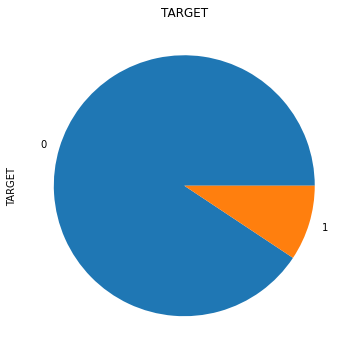

In [152]:
#Plotting pie chart to identify the percentage of type 0 and 1
plt.figure(figsize=[15,6])
inp_merge['TARGET'].value_counts().plot.pie()
plt.title('TARGET')
plt.show()

In [153]:
#Observation: There are more number of peoplw with target value 0 than 1

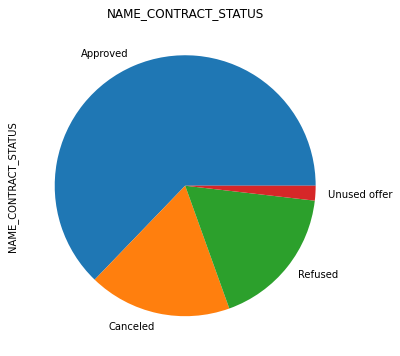

In [154]:
#Plotting pie chart to identify the percentage of various contract status
plt.figure(figsize=[15,6])
inp_merge['NAME_CONTRACT_STATUS'].value_counts().plot.pie()
plt.title('NAME_CONTRACT_STATUS')
plt.show()

In [155]:
#Observation: Maximum people have approved loan status

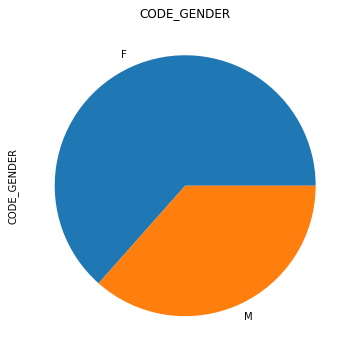

In [156]:
#Plotting pie chart to identify the percentage of male and female
plt.figure(figsize=[15,6])
inp_merge['CODE_GENDER'].value_counts().plot.pie()
plt.title('CODE_GENDER')
plt.show()

In [157]:
#Observation: From above it is clear than female people are more applying for loan

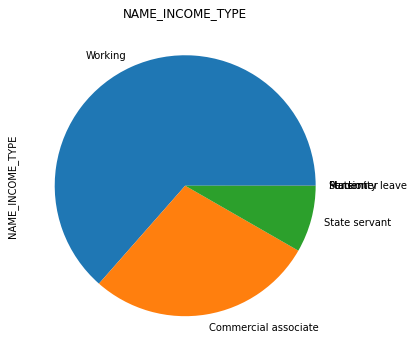

In [158]:
#Plotting pie chart to identify the percentage of various income type status
plt.figure(figsize=[15,6])
inp_merge['NAME_INCOME_TYPE'].value_counts().plot.pie()
plt.title('NAME_INCOME_TYPE')
plt.show()

In [159]:
#Observation: From this it is clear that working people are more applying for loans

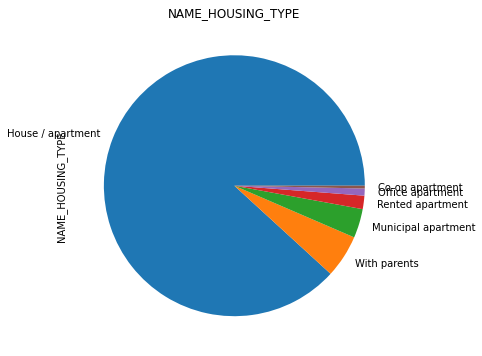

In [160]:
#Plotting pie chart to identify the percentage of various housing type status
plt.figure(figsize=[15,6])
inp_merge['NAME_HOUSING_TYPE'].value_counts().plot.pie()
plt.title('NAME_HOUSING_TYPE')
plt.show()

In [161]:
#Observation: Maximum people have their house/apartment

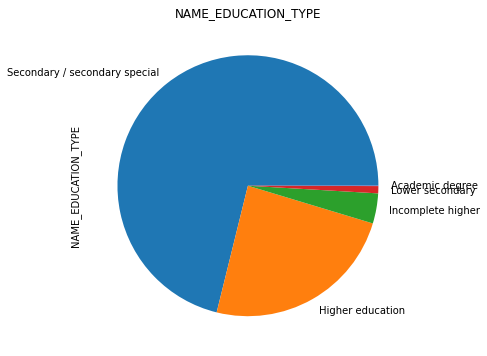

In [162]:
#Plotting pie chart to identify the percentage of various education type status
plt.figure(figsize=[15,6])
inp_merge['NAME_EDUCATION_TYPE'].value_counts().plot.pie()
plt.title('NAME_EDUCATION_TYPE')
plt.show()

In [163]:
#Observation: From the above it is clear that maximum people have secondary/seondary special education

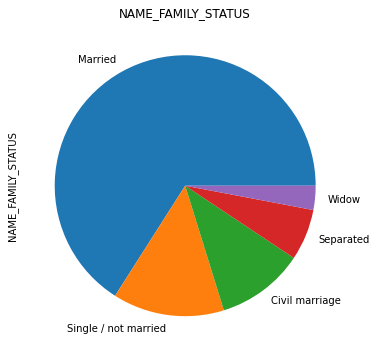

In [164]:
#Plotting pie chart to identify the percentage of various family type status
plt.figure(figsize=[15,6])
inp_merge['NAME_FAMILY_STATUS'].value_counts().plot.pie()
plt.title('NAME_FAMILY_STATUS')
plt.show()

In [165]:
#Observation: From above it is clear that maximum people lies in married category

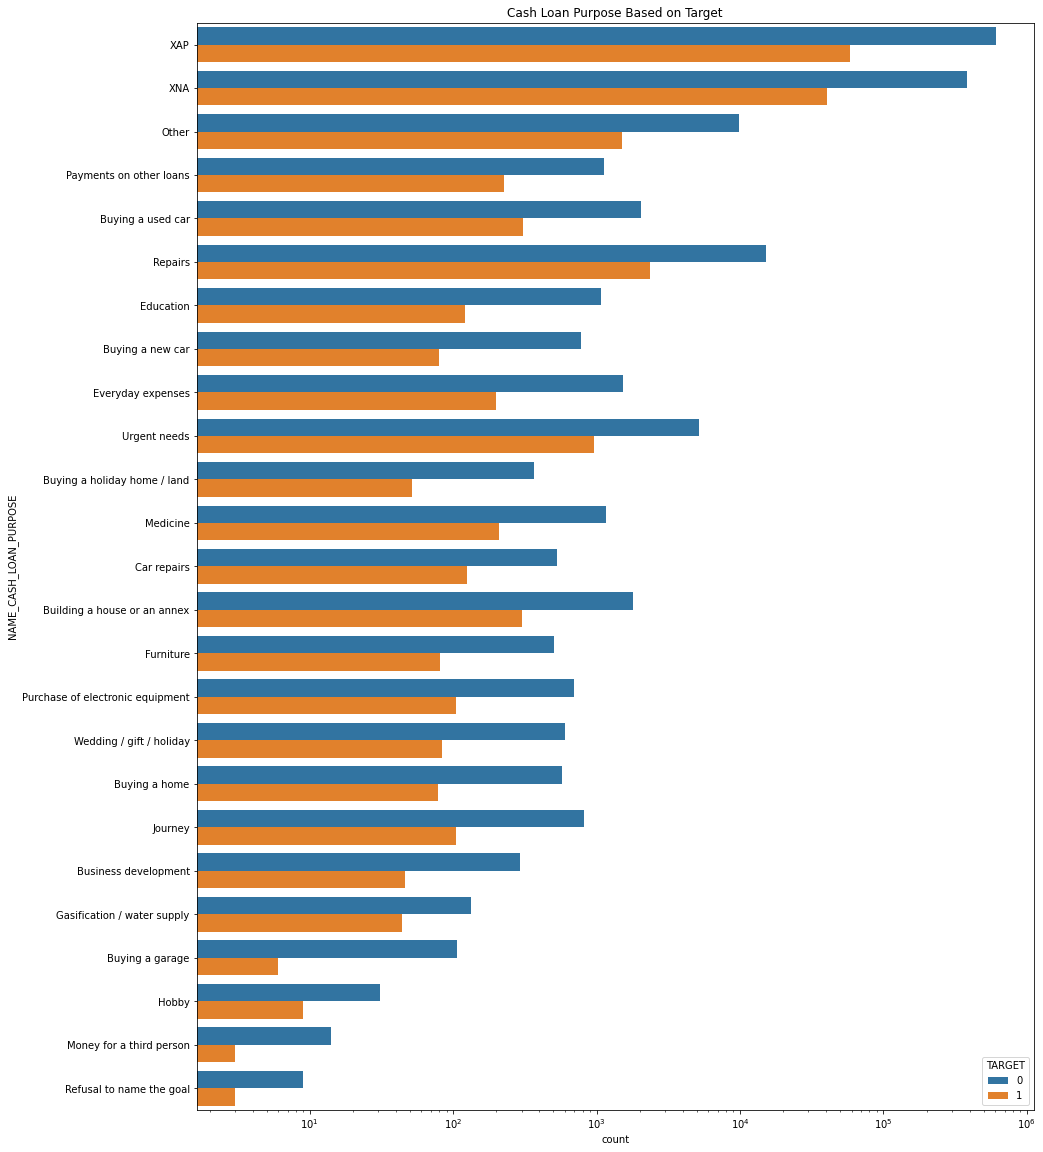

In [166]:
#Plotting bar graph of NAME_CASH_LOAN_PURPOSE based on Target values
plt.figure(figsize=[15,20])
sns.countplot(y= 'NAME_CASH_LOAN_PURPOSE', hue = 'TARGET', data = inp_merge)
plt.xscale('log')
plt.title('Cash Loan Purpose Based on Target')
plt.show()

In [167]:
#Observation: From the above the people taking loan for loan purpose are facing more difficulty in paying for loan

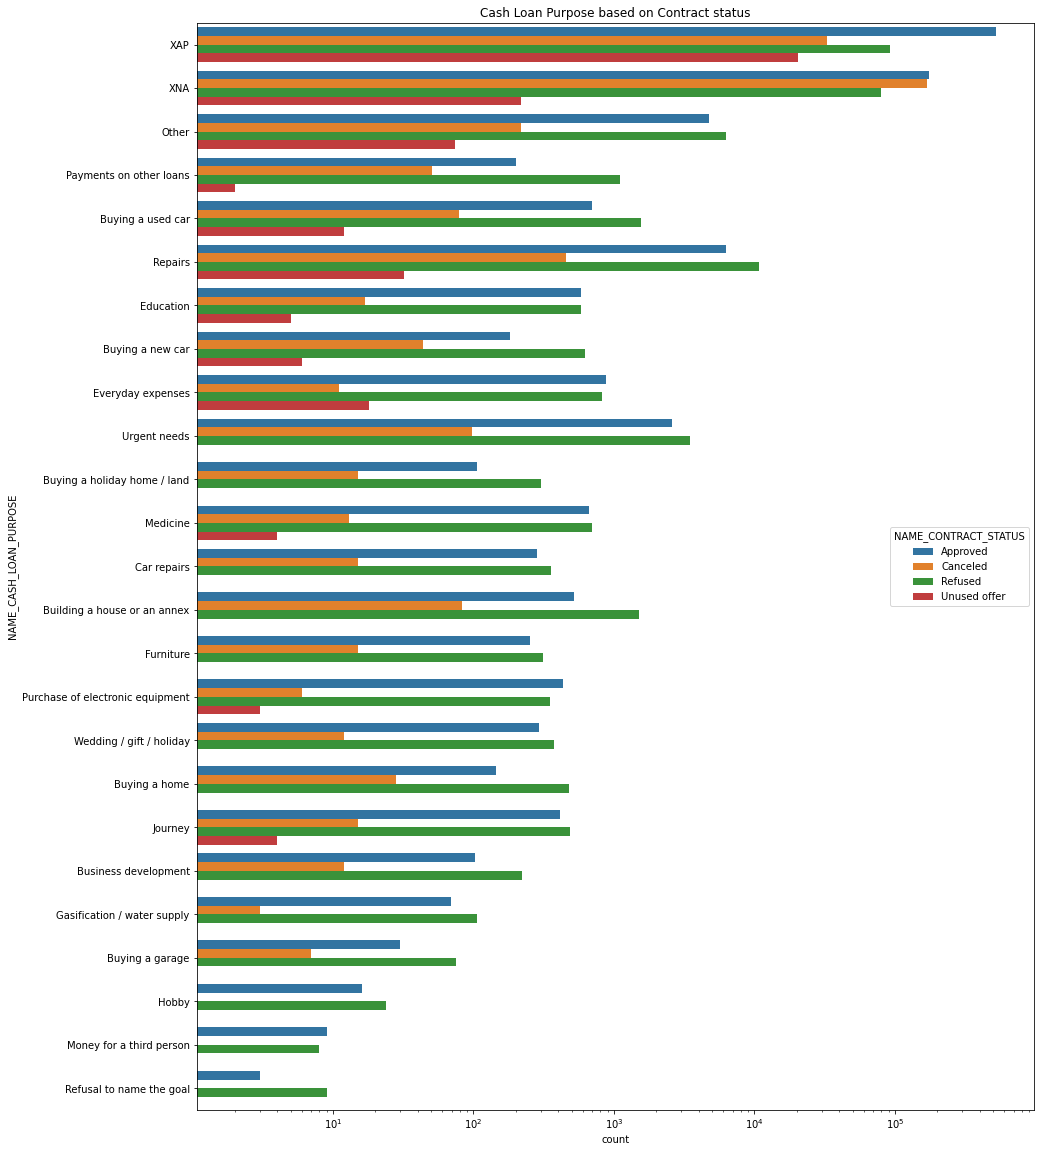

In [168]:
#Plotting bar graph of NAME_CASH_LOAN_PURPOSE based on NAME_CONTRACT_STATUS
plt.figure(figsize=[15,20])
sns.countplot(y= 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS', data = inp_merge)
plt.xscale('log')
plt.title('Cash Loan Purpose based on Contract status')
plt.show()

In [169]:
#Observation: From above it is clear that in repair section more loans are refused
#Observation: In urgent needs and repair section more loans are approved

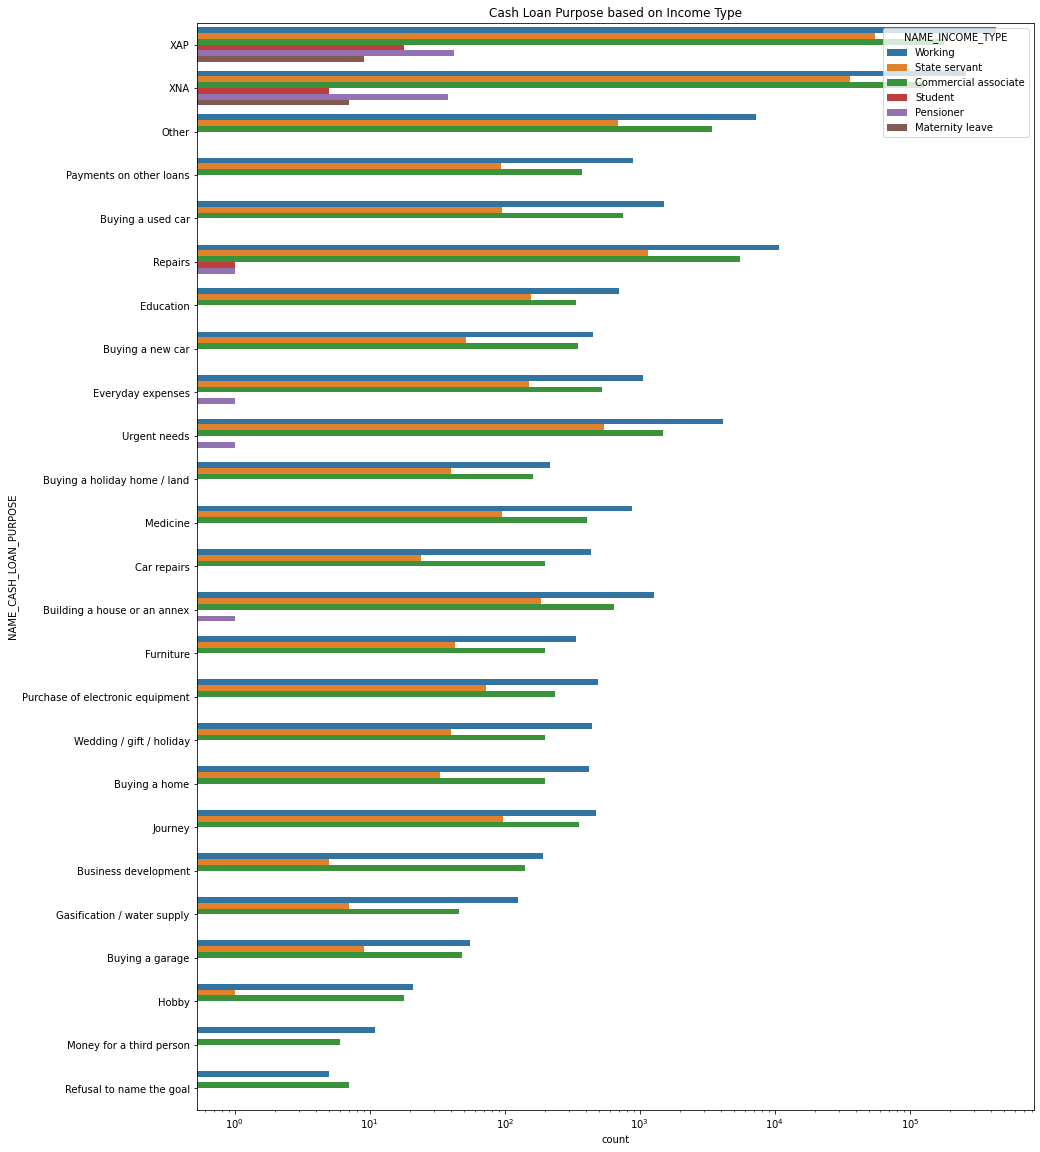

In [170]:
#Plotting bar graph of NAME_CASH_LOAN_PURPOSE based on NAME_INCOME_TYPE values
plt.figure(figsize=[15,20])
sns.countplot(y= 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_INCOME_TYPE', data = inp_merge)
plt.xscale('log')
plt.title('Cash Loan Purpose based on Income Type')
plt.show()

In [171]:
#Observation: Majority if people take loans from working background with purpose of repairs

# Bivariate Analysis

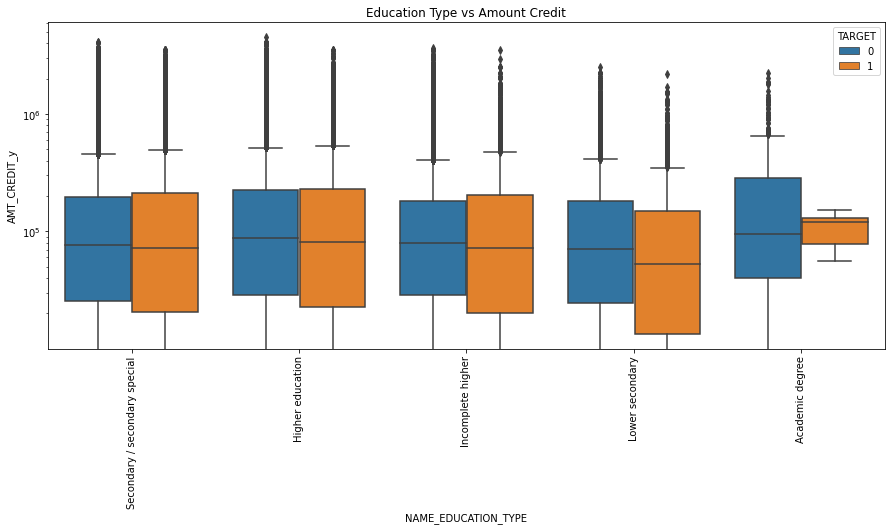

In [172]:
# Analysis between AMT_CREDIT and NAME_EDUCATION_TYPE based on target
plt.figure(figsize=[15,6])
sns.boxplot(data=inp_merge,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_y',hue='TARGET',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [173]:
#Observation: From above it is clear that for target 1 and academic degree there are no ouliers 

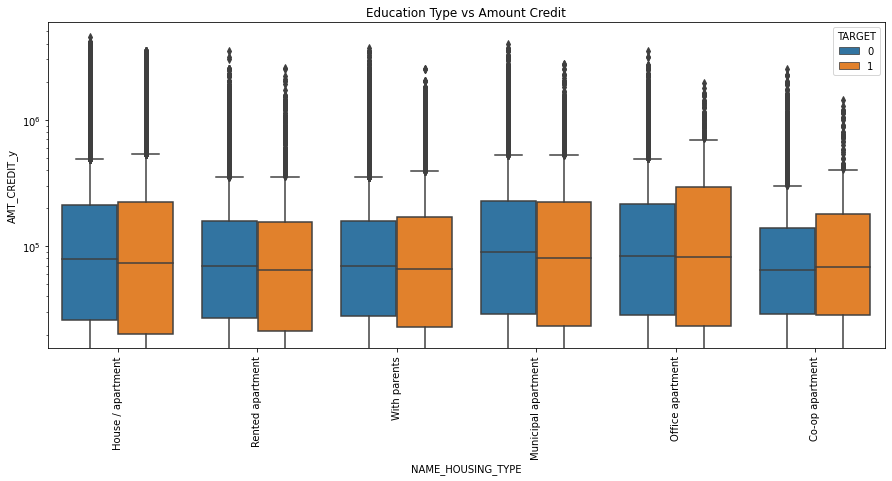

In [174]:
# Analysis between AMT_CREDIT and NAME_HOUSING_TYPE based on target
plt.figure(figsize=[15,6])
sns.boxplot(data=inp_merge,x='NAME_HOUSING_TYPE',y='AMT_CREDIT_y',hue='TARGET',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Education Type vs Amount Credit')
plt.show()

In [175]:
#Observation: From abpove it is clear that for both house/apartment and Office appartment both have problem in paying loan having target=1

# Correlation

In [176]:
#Finding top 10 correlation for inp_merge
x=inp_merge.corr()
a=x.unstack().sort_values(ascending=False)
b=a[a<1]
b.head(10)

AMT_APPLICATION           AMT_GOODS_PRICE_y           0.999849
AMT_GOODS_PRICE_y         AMT_APPLICATION             0.999849
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998536
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998536
AMT_GOODS_PRICE_y         AMT_CREDIT_y                0.992857
AMT_CREDIT_y              AMT_GOODS_PRICE_y           0.992857
                          AMT_APPLICATION             0.973433
AMT_APPLICATION           AMT_CREDIT_y                0.973433
DAYS_LAST_DUE             DAYS_TERMINATION            0.924121
DAYS_TERMINATION          DAYS_LAST_DUE               0.924121
dtype: float64

In [177]:
# Observation: Correlation between AMT_APPLICATION and AMT_GOODS_PRICE_y is close to 1

# Conclusion

1.Bank can mostly look into the people like having repairs reason they have the most rejected loan status

2.Bank should more focus on working type people because they do not have problem in paying loans

3.Bank could maintain a record of sectors like co-op apartment people where they face more problem in timely payment of loans

4.Bank should keep as their credit and income as the reference for deciding whether to give loan or not

5.People having profession of working,student,pensioner they tend to give timely payment of loans